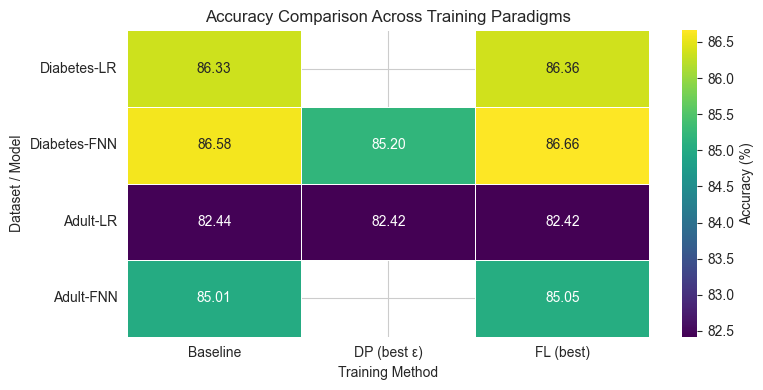

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# =========================
# HEATMAP DATA (REUSE)
# =========================
heatmap_df = pd.DataFrame({
    ("Diabetes", "LR"): {
        "Baseline": 86.33,
        "DP (best ε)": np.nan,
        "FL (best)": 86.36
    },
    ("Diabetes", "FNN"): {
        "Baseline": 86.58,
        "DP (best ε)": 85.20,
        "FL (best)": 86.66
    },
    ("Adult", "LR"): {
        "Baseline": 82.44,
        "DP (best ε)": 82.42,
        "FL (best)": 82.42
    },
    ("Adult", "FNN"): {
        "Baseline": 85.01,
        "DP (best ε)": np.nan,
        "FL (best)": 85.05
    }
}).T

# =========================
# SEABORN HEATMAP
# =========================
plt.figure(figsize=(8, 4))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"label": "Accuracy (%)"}
)

plt.title("Accuracy Comparison Across Training Paradigms")
plt.ylabel("Dataset / Model")
plt.xlabel("Training Method")
plt.tight_layout()
plt.show()


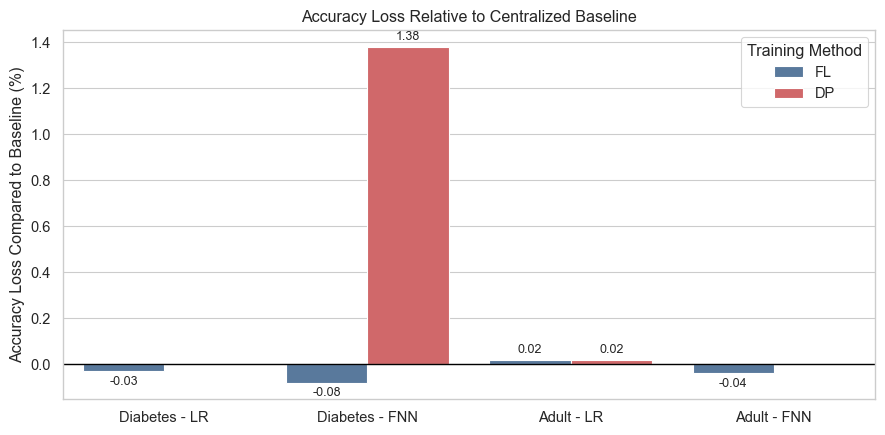

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# DATA
# -------------------------
data = [
    # Dataset, Model, Method, Accuracy
    ("Diabetes", "LR",  "Baseline", 86.33),
    ("Diabetes", "LR",  "FL",       86.36),

    ("Diabetes", "FNN", "Baseline", 86.58),
    ("Diabetes", "FNN", "DP",       85.20),
    ("Diabetes", "FNN", "FL",       86.66),

    ("Adult",    "LR",  "Baseline", 82.44),
    ("Adult",    "LR",  "DP",       82.42),
    ("Adult",    "LR",  "FL",       82.42),

    ("Adult",    "FNN", "Baseline", 85.01),
    ("Adult",    "FNN", "FL",       85.05),
]

df = pd.DataFrame(data, columns=["Dataset", "Model", "Method", "Accuracy"])

# -------------------------
# COMPUTE LOSS VS BASELINE
# -------------------------
baseline = (
    df[df["Method"] == "Baseline"]
    .set_index(["Dataset", "Model"])["Accuracy"]
)

df["Baseline Accuracy"] = df.set_index(["Dataset", "Model"]).index.map(baseline)
df["Accuracy Loss (%)"] = df["Baseline Accuracy"] - df["Accuracy"]

loss_df = df[df["Method"] != "Baseline"].copy()
loss_df["Group"] = loss_df["Dataset"] + " - " + loss_df["Model"]

# -------------------------
# STYLE
# -------------------------
sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.2
)

palette = {
    "DP": "#E15759",   # soft red
    "FL": "#4E79A7"    # muted blue
}

# -------------------------
# PLOT
# -------------------------
plt.figure(figsize=(9, 4.5))

ax = sns.barplot(
    data=loss_df,
    x="Group",
    y="Accuracy Loss (%)",
    hue="Method",
    palette=palette,
    ci=None
)

# Zero-loss reference line
ax.axhline(0, color="black", linewidth=1)

# Annotate bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f",
        padding=3,
        fontsize=9
    )

ax.set_ylabel("Accuracy Loss Compared to Baseline (%)")
ax.set_xlabel("")
ax.set_title("Accuracy Loss Relative to Centralized Baseline")

ax.legend(title="Training Method", frameon=True)
plt.tight_layout()
plt.show()
